# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [7]:
df_data.duplicated().values.any()

False

In [8]:
df_data.isna().values.any()

True

In [9]:
print(f'Total Missing Values: {df_data.isna().values.sum()}')
print(f'Missing Values in Price: {df_data.Price.isna().values.sum()}')
# This means only Price has missing values.

Total Missing Values: 3360
Missing Values in Price: 3360


In [10]:
# Remove missing values
df_data.dropna(inplace=True)
df_data.isna().values.sum()

0

## Descriptive Statistics

In [11]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


In [13]:
# Convert to the best possible dtypes.
df_data = df_data.convert_dtypes()

In [14]:
# Convert Date to datetime format.
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      964 non-null    Int64              
 1   Unnamed: 0.1    964 non-null    Int64              
 2   Organisation    964 non-null    string             
 3   Location        964 non-null    string             
 4   Date            964 non-null    datetime64[ns, UTC]
 5   Detail          964 non-null    string             
 6   Rocket_Status   964 non-null    string             
 7   Price           964 non-null    string             
 8   Mission_Status  964 non-null    string             
dtypes: Int64(2), datetime64[ns, UTC](1), string(6)
memory usage: 77.2 KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
df_launches = df_data.Organisation.value_counts()

In [17]:
g_bar=px.bar(x=df_launches.index, 
             y=df_launches.values, 
             hover_name=df_launches.index,
             color=df_launches.values, 
             color_continuous_scale='Aggrnyl',
             title='Number of Launches by Company')

g_bar.update_layout(xaxis_title='Company', yaxis_title='Number of Launches', coloraxis_showscale=False)
g_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [18]:
df_rocket_status = df_data.Rocket_Status.value_counts()

In [19]:
print(f'Number of Active Rocket is {df_rocket_status[0]}.')
print(f'Number of Retire Rocket is {df_rocket_status[1]}.')

Number of Active Rocket is 586.
Number of Retire Rocket is 378.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
df_data.Mission_Status.value_counts()

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: Int64

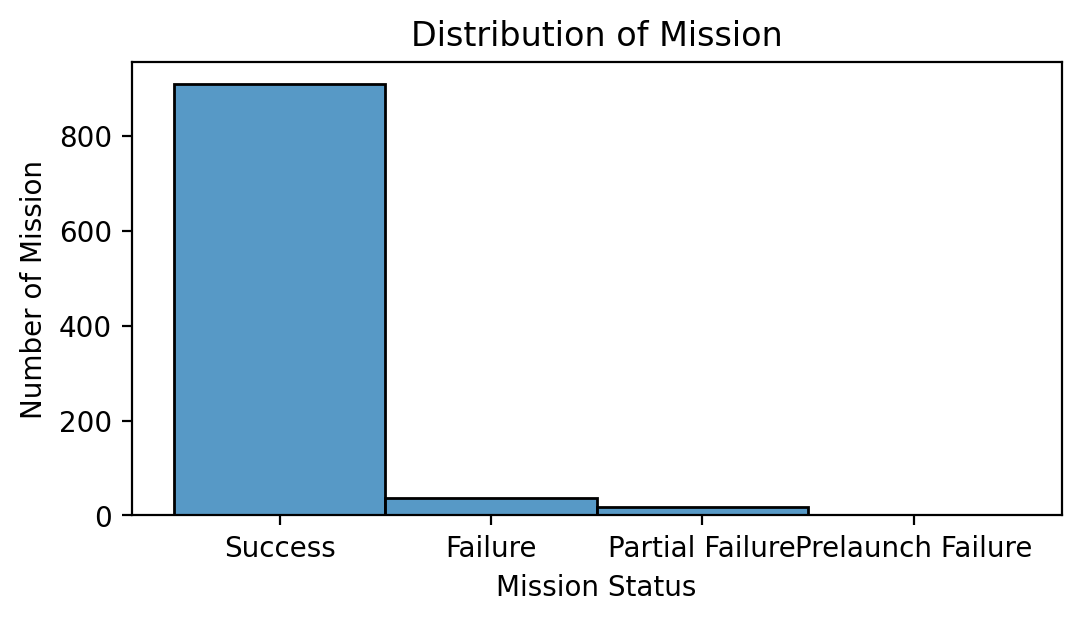

In [21]:
plt.figure(figsize=(6, 3), dpi=200)
sns.histplot(df_data, x='Mission_Status', bins=30)
plt.xlabel('Mission Status')
plt.ylabel('Number of Mission')
plt.title('Distribution of Mission')
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [22]:
# Convert Price to float dtype.
df_data.Price = df_data.Price.str.replace(',','').astype('float')

In [23]:
# Add colume 'Year'.
df_data['Year'] = df_data.Date.dt.year
# Get average launch price by year.
df_price = df_data.groupby('Year', as_index=False)['Price'].mean()

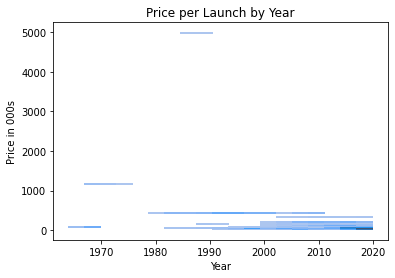

In [24]:
sns.histplot(df_data, x='Year', y='Price', color='#2196f3')

plt.title('Price per Launch by Year')
plt.xlabel('Year')
plt.ylabel('Price in 000s')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
# Create an array of list of countries' addresses.
all_countries = df_data.Location.str.split(',', expand=False).values

In [26]:
country_list = []
# Loop through all_countries and extract the country name from address.
for n in range(len(df_data)):
  country = all_countries[n][-1]
  country = country.strip()
  country = country.replace('Russia', 'Russian Federation')
  country = country.replace('New Mexico', 'USA')
  country = country.replace('Yellow Sea', 'China')
  country = country.replace('Shahrud Missile Test Site', 'Iran')
  country = country.replace('Pacific Missile Range Facility', 'USA')
  country = country.replace('Gran Canaria', 'USA')
  country_list.append(countries.get(country).alpha3)
df_data['Country'] = country_list
  

In [27]:
# Create a Dataframe of 'Failure' and count the number of failure.
df_failure = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Country', as_index=False).count()

In [28]:
fig = px.choropleth(df_failure, locations='Country', locationmode='ISO-3',
                    color='Mission_Status', color_continuous_scale="Viridis",
                    range_color=(0, 12),labels={'Mission_Status':'Mission Status'},
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [29]:
df_country = df_data
# Create 'Launches' to show in Sunburst Chart nicely.
df_country['Launches'] = 1
df_country = df_data.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Launches': pd.Series.count})

In [30]:
burst = px.sunburst(
    df_country,
    path = ['Country', 'Organisation', 'Mission_Status',],
    values='Launches',
)

burst.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [31]:
df_money = df_data.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})

In [32]:
df_money

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [33]:
df_price_per_launch = df_data.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.mean})

In [34]:
df_price_per_launch

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00
5,Eurockot,41.80
6,ExPace,28.30
7,ILS,101.54
8,ISRO,32.49
9,JAXA,56.00


# Chart the Number of Launches per Year

In [35]:
df_data.groupby(['Year'], as_index=False).agg({'Mission_Status': pd.Series.count})

,Year,Mission_Status
0,1964,2
1,1965,2
2,1966,3
3,1967,8
4,1968,10
5,1969,8
6,1970,1
7,1971,2
8,1972,2
9,1973,1


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [36]:
df_month = df_data

In [37]:
all_dates = df_month.Date.dt.to_pydatetime()

In [38]:
dates = []
# Extract date info and convert to 1st day of month in order to consolidate launches by month.
for n in range(len(all_dates)):
  dates.append(all_dates[n].date().replace(day=1))
df_month['Month'] = dates

In [39]:
# Convert to datetime object
df_month.Month.astype('datetime64')

0      2020-08-01
1      2020-08-01
3      2020-07-01
4      2020-07-01
5      2020-07-01
          ...    
3855   1966-07-01
3971   1965-05-01
3993   1965-02-01
4000   1964-12-01
4020   1964-09-01
Name: Month, Length: 964, dtype: datetime64[ns]

In [40]:
# as_index=False will return a DataFrame rather than indexing series.
launches_per_month = df_month.groupby('Month', as_index=False).agg({'Launches': pd.Series.count})
launches_rolling = launches_per_month['Launches'].rolling(5).mean()

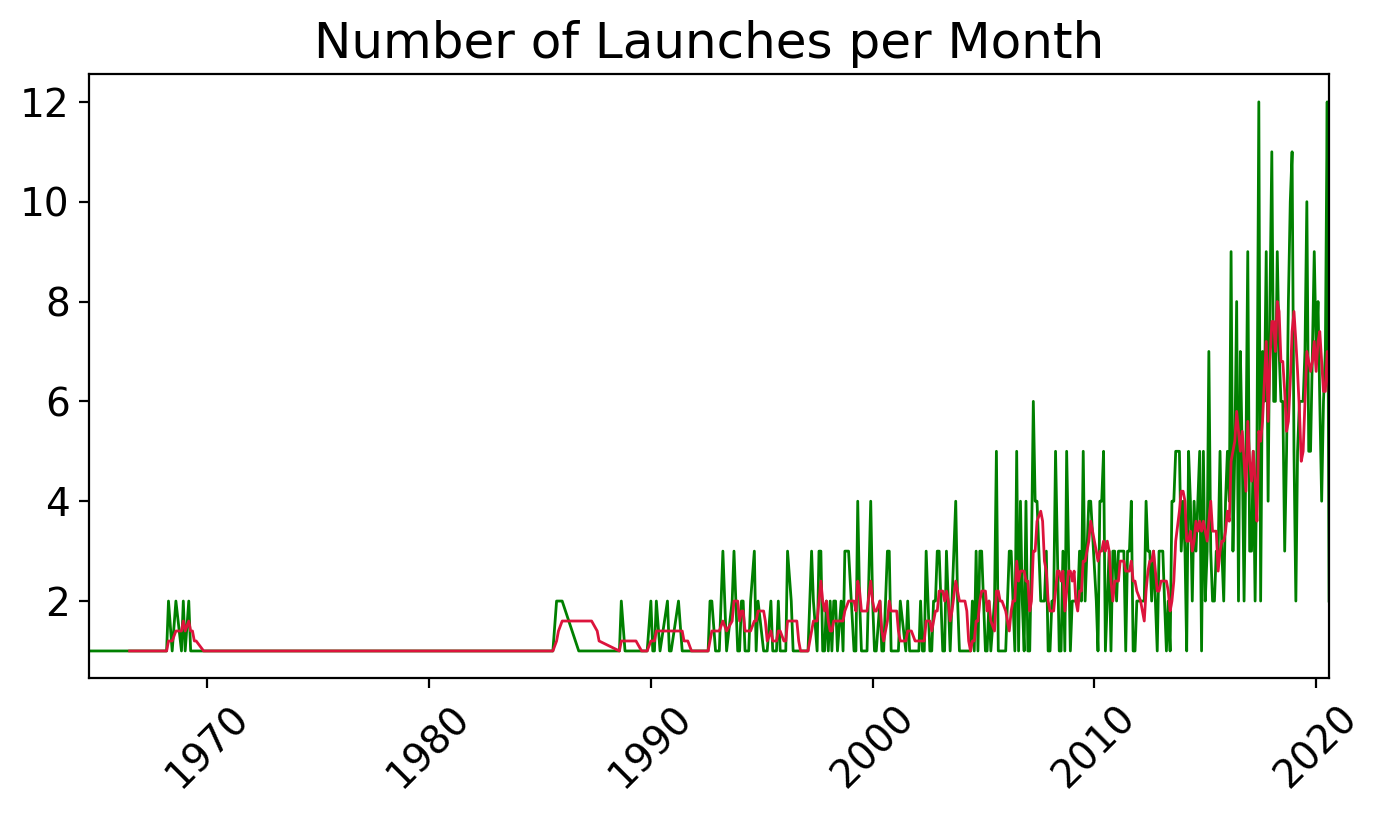

In [41]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Launches per Month', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, 
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(launches_per_month.Month.min(), launches_per_month.Month.max())

ax.plot(launches_per_month.Month,
        launches_per_month.Launches,
        color='green',
        linewidth=1
        )

ax.plot(launches_per_month.Month,
        launches_rolling.values,
        color='crimson',
        linewidth=1)


plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [42]:
df_month['Month_Only'] = df_month.Date.dt.month
df_month.groupby('Month_Only', as_index=False).agg({'Launches': pd.Series.count}).max()

Month_Only    12
Launches      92
dtype: int64

In [43]:
df_month.groupby('Month_Only', as_index=False).agg({'Launches': pd.Series.count}).min()

Month_Only     1
Launches      60
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [44]:
fig = px.line(df_data, x="Year", y="Price", title='Launch Price over Time')
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [45]:
# Find top 10 organisation by total Launches.
df_top10 = df_data.groupby(['Organisation'], as_index=False).agg({'Launches': pd.Series.count}).sort_values('Launches', ascending=False).head(10)
# Create df with 'Organisation, 'Year', and 'Launches by year.
df_org = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Launches': pd.Series.count})
# df_org['Organisation'].isin(df_top10['Organisation'] only use data from top 10 organisation.
fig = px.line(df_org[df_org['Organisation'].isin(df_top10['Organisation'])], x="Year", y="Launches", color='Organisation', title='Launches by Organisation over Time')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [46]:
df_all_country = df_data.groupby(['Year', 'Country', 'Mission_Status'], as_index=False).agg({'Launches': pd.Series.count})
# Group KAZ and RUS into USSR.
df_all_country.Country = df_all_country.Country.replace('KAZ', 'USSR')
df_all_country.Country = df_all_country.Country.replace('RUS', 'USSR')
USA_USSR = ['USA', 'USSR']
fig = px.pie(df_all_country[df_all_country['Country'].isin(USA_USSR)], values='Launches', names='Country', title='Number of Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [47]:
fig = px.line(df_all_country[df_all_country['Country'].isin(USA_USSR)], x="Year", y="Launches", color='Country', title='Launches by Organisation over Time')
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [48]:

fig = px.line(df_all_country[(df_all_country.Mission_Status=='Failure') & (df_all_country['Country'].isin(USA_USSR))], 
              x="Year", y="Launches", color='Country', title='Launches by Organisation over Time')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [449]:
df_mission = df_all_country.groupby(['Year', 'Country'], as_index=False).Mission_Status.count()

In [451]:
df_mission_fail = df_all_country[df_all_country.Mission_Status == 'Failure'].groupby(['Year', 'Country'], as_index=False).Mission_Status.count()

In [452]:
failure_rate = []
for year in df_mission.Year:
  country = df_mission[df_mission.Year == year].Country.values[0]
  all_mission = df_mission[(df_mission.Year == year) & (df_mission.Country == country)].Mission_Status.values[0]
  try:
    fail = df_mission_fail[(df_mission_fail.Year == year) & (df_mission_fail.Country == country)].Mission_Status.values[0]
    failure_rate.append(fail/all_mission)
    continue
  except:
    failure_rate.append(0.0)
    continue
df_mission['Failure_Rate'] = failure_rate

In [468]:
fig = px.bar(df_mission[df_mission['Country'].isin(USA_USSR)], 
             x='Year', y='Failure_Rate', color='Country', barmode='group',
             title='Failure Rate by Year')
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [301]:
df_mission_status = df_data.groupby(['Year', 'Country', 'Mission_Status'], as_index=False).agg({'Launches': pd.Series.count})
fig = px.bar(df_mission_status[df_mission_status['Mission_Status'] == 'Failure'],
             x="Year", y="Launches", color='Country', barmode='group',
             title='Failure Launches by Country by Year')
fig.show()

In [465]:
fig = px.bar(df_mission_status[df_mission_status['Mission_Status'] == 'Success'], 
             x="Year", y="Launches", color='Country', barmode='group',
             title='Success Launches by Country over Time')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [244]:
df_by_year = df_data.groupby(['Year', 'Organisation'], as_index=False).count()

In [444]:
df_by_year.head(10)

,Year,Organisation,Unnamed: 0,Unnamed: 0.1,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launches,Month,Month_Only
0,1964,US Air Force,2,2,2,2,2,2,2,2,2,2,2,2
1,1965,US Air Force,2,2,2,2,2,2,2,2,2,2,2,2
2,1966,US Air Force,3,3,3,3,3,3,3,3,3,3,3,3
3,1967,NASA,1,1,1,1,1,1,1,1,1,1,1,1
4,1967,US Air Force,7,7,7,7,7,7,7,7,7,7,7,7
5,1968,NASA,2,2,2,2,2,2,2,2,2,2,2,2
6,1968,US Air Force,8,8,8,8,8,8,8,8,8,8,8,8
7,1969,NASA,4,4,4,4,4,4,4,4,4,4,4,4
8,1969,US Air Force,4,4,4,4,4,4,4,4,4,4,4,4
9,1970,NASA,1,1,1,1,1,1,1,1,1,1,1,1


In [463]:
top_by_year = []
old_year = 0
for year in df_by_year.Year:
  if old_year != year:
    top = df_by_year[df_by_year.Year == year].sort_values('Launches', ascending=False).iloc[0]
    top_by_year.append([top.Year, top.Organisation, top.Launches])
    old_year = year
top_by_year = pd.DataFrame(top_by_year, columns=('Year', 'Organisation', 'Launches'))

In [466]:
fig = px.bar(top_by_year, x='Year', y='Launches', color='Organisation')
fig.show()

In [434]:
df_by_year.tail(20)

,Year,Organisation,Unnamed: 0,Unnamed: 0.1,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launches,Month,Month_Only
248,2019,JAXA,1,1,1,1,1,1,1,1,1,1,1,1
249,2019,MHI,1,1,1,1,1,1,1,1,1,1,1,1
250,2019,Northrop,3,3,3,3,3,3,3,3,3,3,3,3
251,2019,Rocket Lab,6,6,6,6,6,6,6,6,6,6,6,6
252,2019,Roscosmos,8,8,8,8,8,8,8,8,8,8,8,8
253,2019,SpaceX,13,13,13,13,13,13,13,13,13,13,13,13
254,2019,ULA,3,3,3,3,3,3,3,3,3,3,3,3
255,2019,VKS RF,5,5,5,5,5,5,5,5,5,5,5,5
256,2020,Arianespace,4,4,4,4,4,4,4,4,4,4,4,4
257,2020,CASC,16,16,16,16,16,16,16,16,16,16,16,16
